# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
#necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
#read in the two csv datasets
temp_data1 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv')
temp_data2 = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv')

#concat both into one large dataframe
temp_df = pd.concat([temp_data1, temp_data2])
temp_df

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
#reading the csv files
fips = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv')
station = pd.read_csv('https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv')


#fips have columns FIPS 10-4 , ISO 3166, Name
#station has columns ID, LATITUDE, LONGITUDE, STNELEV, NAME

#need to clean fips dataset by removing double quotation marks from data 
fips = fips.replace('"', '')

#create new column in station called 'FIPS 10-4' that has the first two letters of elements in 'ID'
station['FIPS 10-4'] = station['ID'].str[0:2]

#merge station data and fips data using the 'FIPS 10-4' column from both
merged_df = station.merge(fips, on='FIPS 10-4')

#merge merge data and temperatures data using the 'ID' column from both
df = temp_df.merge(merged_df, on = "ID")

#temperature is in the 1000s, so get it down to realistic temperatures in degrees C
#change VALUE 1-12 to MONTH 1- 12
for i in range(1,13):
    df['VALUE' + str(i)]  = df['VALUE' + str(i)] / 100
    df  = df.rename(columns={'VALUE' + str(i): 'MONTH' + str(i)})
    
#rename 'Name' to 'Country' 
df = df.rename(columns={'Name': 'Country'})
df

,ID,Year,MONTH1,MONTH2,MONTH3,MONTH4,MONTH5,MONTH6,MONTH7,MONTH8,...,MONTH10,MONTH11,MONTH12,LATITUDE,LONGITUDE,STNELEV,NAME,FIPS 10-4,ISO 3166,Country
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,...,16.04,13.64,10.04,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,...,16.94,14.94,11.34,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,...,19.26,13.56,10.56,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,...,18.26,13.76,12.46,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,...,17.16,13.86,10.76,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG,DZ,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZI000067983,2012,21.86,NaN,21.57,18.33,18.35,16.25,15.63,NaN,...,NaN,22.98,21.99,-20.2000,32.616,1132.0,CHIPINGE,ZI,ZW,Zimbabwe
181311,ZI000067983,2013,NaN,21.63,20.54,18.70,17.29,16.86,15.28,18.62,...,19.67,22.58,21.42,-20.2000,32.616,1132.0,CHIPINGE,ZI,ZW,Zimbabwe
181312,ZI000067983,2014,NaN,21.87,NaN,NaN,NaN,NaN,NaN,NaN,...,21.10,22.97,NaN,-20.2000,32.616,1132.0,CHIPINGE,ZI,ZW,Zimbabwe
181313,ZI000067983,2015,21.75,22.51,20.83,19.52,18.80,16.70,16.50,18.10,...,22.90,22.30,24.05,-20.2000,32.616,1132.0,CHIPINGE,ZI,ZW,Zimbabwe


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [4]:
def query_climate(df, country, year_begin, year_end, month):
    '''
    a method that returns a dataframe of temperature readings for a specific country.
    the user can sepcific the start year, end year, and the month for the reading
    
    Parameters
    ----------
    df: an user-supplied dataframe
    country: an user-supplied country 
    year_begin: an user-supplied start year for temperature reading
    year_end: an user-supplied end year for temperature reading
    month: an user-supplied specific month for temperature reading
    
    Return
    ------
    final_df: the dataframe that contains the temperature readings with the user-supplied parameters
    
    '''
    #create copy to not change original data
    copy_df = df.copy()

    #filter based on country, start year, end year
    copy_df = copy_df[(copy_df['Country'] == country) & 
                     (copy_df['Year'] >= year_begin) & 
                     (copy_df['Year'] <= year_end) ]
                     
    
    # New column for given month
    copy_df['Month'] = month

    #rename 'MONTH' + str(month) to 'Temp'
    copy_df = copy_df.rename(columns = {'MONTH' + str(month) : 'Temp'})

    #save only necessary columns to new df and return
    final_df = copy_df[['NAME', 'LATITUDE', 'LONGITUDE', 'Country', 'Year', 'Month', 'Temp']]
    return final_df
    
    



Run this example and check if you get the correct result, your obtained dataframe looks like:

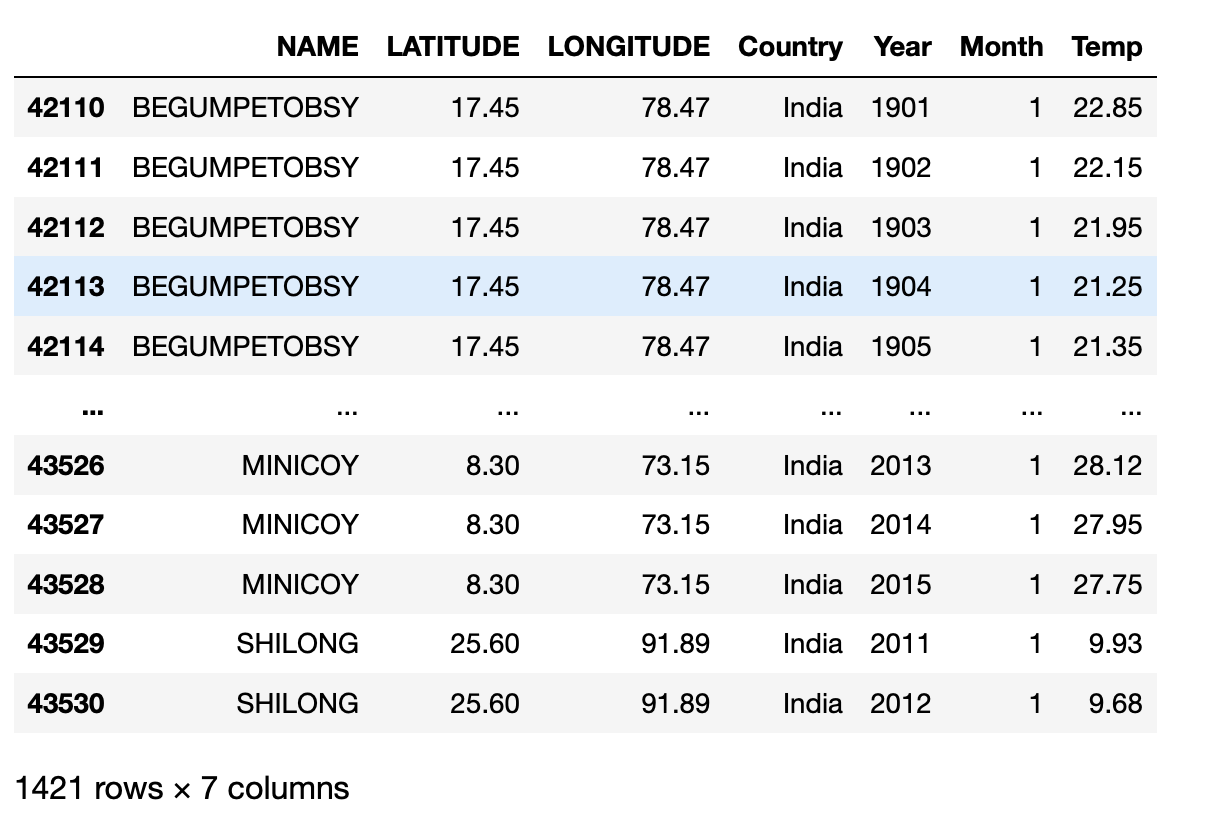

In [5]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
10860,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
10861,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
10862,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
10863,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
10864,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
97548,MINICOY,8.30,73.15,India,2013,1,28.12
97549,MINICOY,8.30,73.15,India,2014,1,27.95
97550,MINICOY,8.30,73.15,India,2015,1,27.75
97551,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

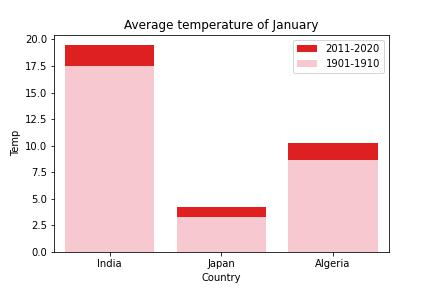

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

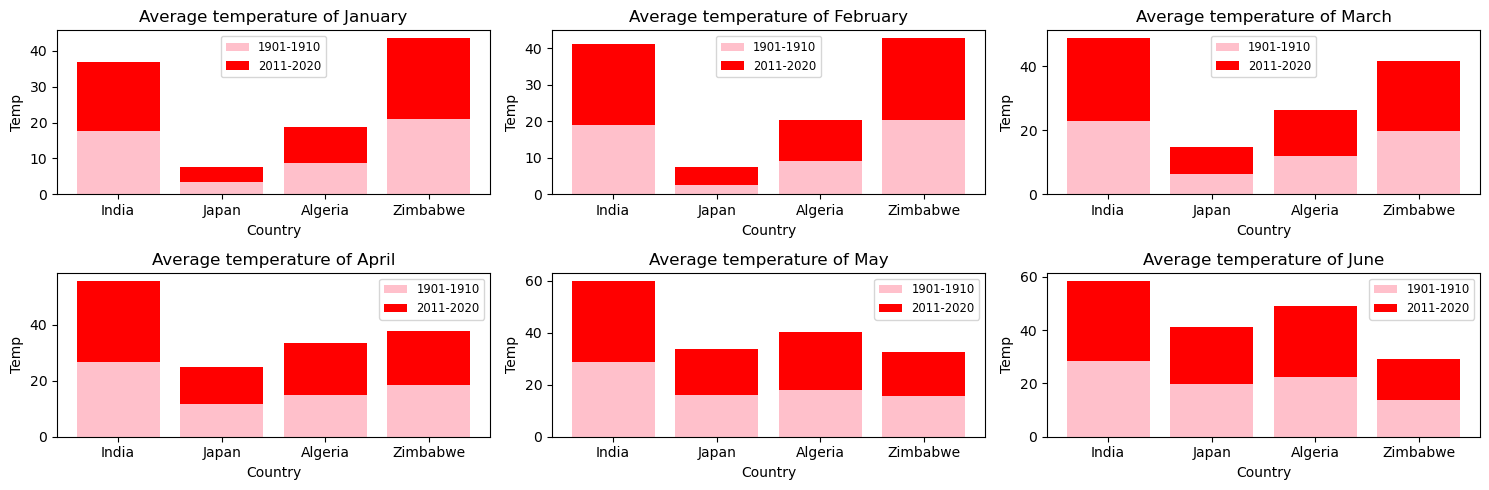

In [6]:
def avg_temperatures(countries, months):
    '''
    computes two average temperatures for each country in each certain month. It then plots those datas to see the change in temperature.

    Parameters
    ----------
    countries : the list of countries
    months : the list of months
    '''

    #dictionary for converting month values to month names
    month_names = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
        7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }

    #create 6 subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 5))

    #flatten to make indexing easier
    axes = axes.flatten()

    #iterates through each month
    for i in range(len(months)):
          
        month = months[i]

        #iterate through each country
        for j in range(len(countries)):
            country = countries[j]
            
            #take the average temperatures of year range 1901-1910 
            avg_temp1 = query_climate(df, country, 1901, 1910, month)['Temp'].mean()
            
            #take the average temperatures of year range 2011-2020
            avg_temp2 = query_climate(df, country, 2011, 2020, month)['Temp'].mean()

            #transform the average temperatures into dataframes
            avg_temp1_df = pd.DataFrame({'Country': [country], 'Temp': [avg_temp1]})
            avg_temp2_df = pd.DataFrame({'Country': [country], 'Temp': [avg_temp2]})
            
            #create bar graph, put 2011-2020 on top of 1901-1910.
            axes[i].bar(x = country, height = avg_temp1_df['Temp'], color = 'pink', label='1901-1910')
            axes[i].bar(x = country, height = avg_temp2_df['Temp'], color = 'red', label='2011-2020', bottom=avg_temp1_df['Temp'])

        #labeling, legend, title
        axes[i].set_title("Average temperature of " + month_names[month])
        axes[i].set_xlabel('Country')
        axes[i].set_ylabel('Temp')
        axes[i].legend(['1901-1910', '2011-2020'], loc = 'best' ,fontsize='small')

      
    
    #displays plot
    plt.tight_layout()
    plt.show()


        


#lists of countries and months
countriesList = ['India', 'Japan', 'Algeria', 'Zimbabwe']
monthsList = [1,2,3,4,5,6]

#calling function
avg_temperatures(countriesList, monthsList)


## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

Joint Kernel Density Estimate Plot

<Figure size 1600x900 with 0 Axes>

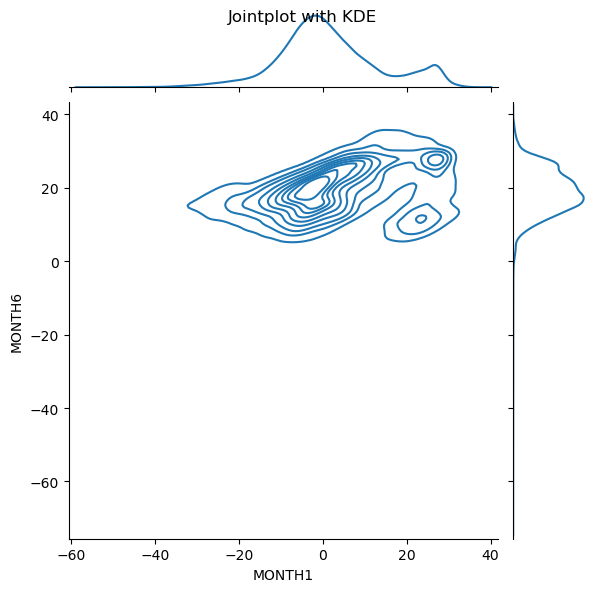

In [10]:
def joint_kde(df, x_col, y_col):
    '''
    plots the joint distribution with kernel density estimate (kde) for 2 user-supplied columns from dataframe given

    Parameters
    ----------
    df : dataframe 
    x_col : x_axis column
    y_col : y_axis column

    '''
    #create plt
    plt.figure(figsize = (16,9))

    # show the joint distribution using kernel density estimation using existing dataframe
    sns.jointplot(
        data=df,
        x=x_col, y=y_col,
        kind="kde",
    )
    
    #set title
    plt.suptitle('Jointplot with KDE')

    # displays plot
    plt.show()

joint_kde(df=df, x_col="MONTH1", y_col="MONTH6")

The joint_kde function takes in the dataframe and two columns, and it creates a joint kernel density estimate plot to find the relationship between the user-supplied columns from the dataframe. 

We passed in the dataframe df, as well as two different months MONTH1 and MONTH6.

We can see that there are more points at month 1, temp 0. This indicates that there are more occurrences of temperatures around 0°C during month 1, which means that in general, for all countries, the average seems to be on the colder side. 

We can also see that there are more points at month 6, temp 20: Conversely, this means that there are more occurrences of temperatures around 20°C during month 6, which suggests that in general, for all countries, the average temperature seems to be about 20 degrees more warmer than January. 

Heat Map

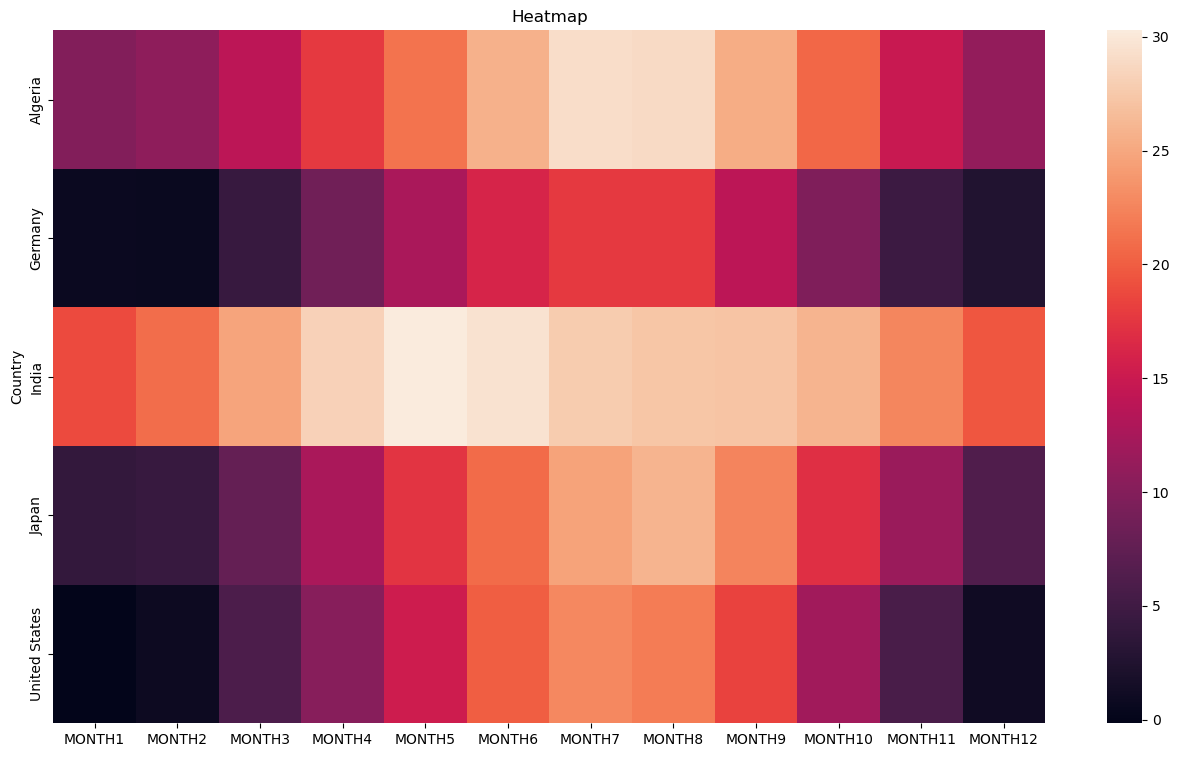

In [8]:
def heat_map(df, countriesList):
    '''
    
    This function creates a heatmap based on the countries and months from January to Decemeber
    
    Parameters
    ----------
    df : the dataframe
    countriesList : list of countries to be used in heatmap
    '''

    #creates copy of original dataframe
    copy_df = df.copy()

    #drops unnecessary columns and uses 'Country' as the index
    copy_df  = copy_df.drop(columns=['ID', 'Year', 'LATITUDE', 'LONGITUDE', 'STNELEV', 'NAME', 'FIPS 10-4', 'ISO 3166'], axis=1).set_index('Country')

    #uses only the user supplied countries
    copy_df = copy_df.loc[countriesList]

    #find average temperatures for each month of countries to only have number of rows equal to number of countries provided
    copy_df = copy_df.groupby('Country').mean()
    
    #plots heatmap with title
    plt.figure(figsize=(16,9))
    sns.heatmap(copy_df)
    plt.title('Heatmap')
    plt.show()

countries = ['Japan', 'India', 'United States', 'Germany', 'Algeria']
heat_map(df=df, countriesList = countries)

This is a annotated heatmap based on various countries which is supplied by the user. It can help us visualize which countries have higher temperatures depending on the months.

We passed in the countries used as 'Japan', 'India', 'United States', 'Germany', 'Algeria'. We will use these countries to check how temperatures have changed over the years for all the months. 

From this heatmap created, we see that India has the highest temperatures overall for every month. We also see that Germany and United States looks to have the lower side of temperatures overall for every month. Therefore, we know which countries will have higher temperatures and lower temperatures for each month. 

Line Plot

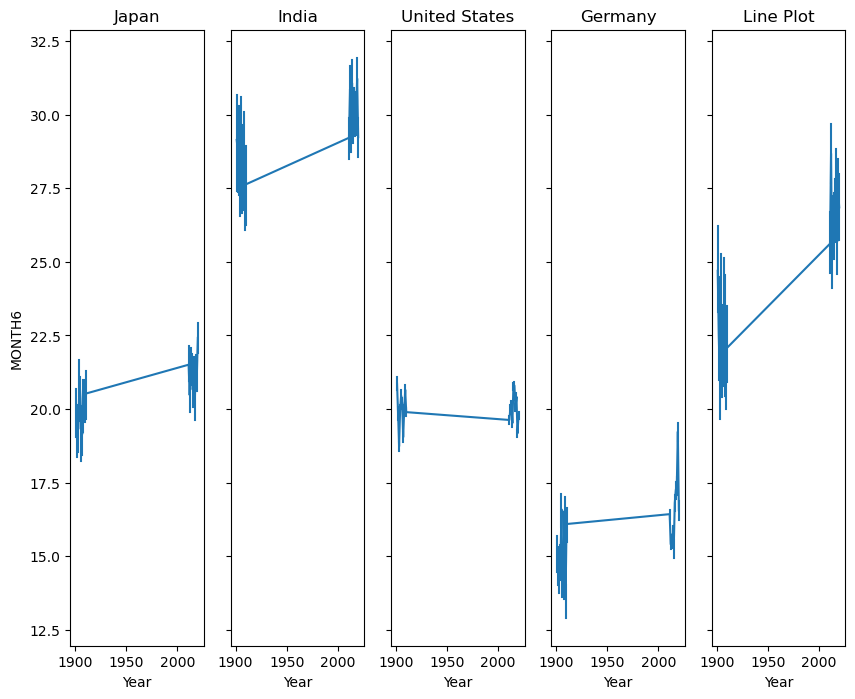

In [9]:
def line_plot(df, countriesList):
    '''
    creates a line plot for given dataframe with user-supplied parameters

    Parameters
    ----------
    df : the dataframe
    countriesList : list of user-supplied countries
    
    '''
    # create copy of dataframe
    copy_df = df.copy()
    
    # filter dataframe to only contain user-supplied countries
    copy_df = copy_df[copy_df['Country'].isin(countriesList)]
    
    #create figures that share same y-axis ticks
    fig, ax = plt.subplots(1, len(countriesList), figsize=(10, 8), sharey=True)
    #for each country in the list, create the lineplot
    for i in range(len(countriesList)):
        #x-axis is the years, y-axis is the temperatures in month 6, no error bar, set title
        sns.lineplot(data=copy_df[copy_df['Country'] == countriesList[i]], x='Year', y='MONTH6', err_style='bars', ax=ax[i])
        ax[i].set_title(countriesList[i])
    #display plot
    plt.title("Line Plot")
    plt.show()

#example
countries = ['Japan', 'India', 'United States', 'Germany', 'Algeria']
line_plot(df, countriesList=countries)


This is a line plot based on different countries, where the x-axis is all the years, and y-axis is the user-supplied temperatures of a specific month.

We passed in 'MONTH6' as y-axis, and passed in the countries 'Japan', 'India', 'United States', 'Germany', 'Algeria'.

As a result, we have a line plot of 5 countries, and we can understand much more about the temperature change over the years. Along with the heatmap from the previous time, we can notice that temperature has been constantly increasing and constantly decreasing for United States for most years between 1901-2020. However, it fluctuates randomly near the ends of the year ranges. 

This can mean that climate change is getting worse, as temperature is becoming unpredicatable. 

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/kyoimura/HW1